In [2]:
import csv, numpy, pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

In [3]:
kickData = pd.read_csv('kickData.csv', usecols=['name', 'main_category', 'sub_category', 'launched_at', 'deadline', 'state', 'goal', 'pledged', 'percentage_funded', 'backers_count', 'popularity_rank', 'currency'], escapechar='\\')

In [4]:
kickData.head()

,name,main_category,sub_category,launched_at,deadline,state,goal,pledged,percentage_funded,backers_count,popularity_rank,currency
0,The Cargo Sling - Don't Lose Your Load on the ...,Design,Product Design,2013-06-02 00:12:16,2013-07-02 00:12:16,failed,3500.0,706.00,0.20171,13,NaN,USD
1,Starlite objects project.,Design,Product Design,2013-06-02 00:13:57,2013-06-22 00:13:57,failed,4000.0,8.00,0.00200,1,NaN,GBP
2,Fall and Recover: A Refugee Dance Film,Film & Video,Film & Video,2013-06-02 00:52:44,2013-08-01 00:52:44,successful,8000.0,8550.00,1.06875,92,NaN,USD
3,After 68: The Rise and Fall of The Ambassador ...,Film & Video,Documentary,2013-06-02 02:00:01,2013-07-24 02:00:01,failed,150000.0,16139.87,0.10760,167,NaN,USD
4,TagPodz: A Pet Tag Silencer for Dogs (Canceled),Design,Product Design,2013-06-02 02:30:46,2013-08-01 02:30:46,canceled,17500.0,1849.00,0.10566,97,NaN,USD


In [25]:
kickGames=kickData.query('sub_category == "Tabletop Games"')
kickGames = kickGames.query('state == "successful"')

In [26]:
kickGames.head()
print(len(kickGames))

7097


In [27]:
bggData = pd.read_csv('bggData.csv', usecols=['name', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'average_weight', 'types', 'categories', 'mechanics'])

In [28]:
bggData.head()
print(len(bggData))

95777


In [29]:
merged = kickGames.merge(bggData, on='name')

In [30]:
print(len(merged))

1249


In [31]:
merged.head(10)

,name,main_category,sub_category,launched_at,deadline,state,goal,pledged,percentage_funded,backers_count,...,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,average_weight,types,categories,mechanics
0,Fairytale Games: The Battle Royale,Games,Tabletop Games,2013-06-03 15:28:41,2013-07-03 15:28:41,successful,35000.0,139658.11,3.99023,1340,...,5.46066,258,26,13,81,56,3.7500,"boardgame,thematic","Adventure,Bluffing,Card Game,Exploration,Fanta...","Campaign / Battle Card Driven,Card Drafting,Co..."
1,New Amsterdam,Games,Tabletop Games,2013-06-04 11:37:24,2013-06-29 03:59:00,successful,5000.0,34743.00,6.94860,365,...,6.33103,1411,76,102,350,328,3.2308,"boardgame,strategygames","Economic,Renaissance","Area Control / Area Influence,Auction/Bidding,..."
2,Cthulhu Wars,Games,Tabletop Games,2013-06-07 19:14:50,2013-07-07 19:14:50,successful,40000.0,1403981.04,35.09953,4389,...,7.18197,3571,34,311,1500,629,3.1099,"boardgame,thematic,strategygames","Fantasy,Fighting,Horror,Miniatures","Action Point Allowance System,Area Movement,Di..."
3,Rockwell,Games,Tabletop Games,2013-06-08 23:15:40,2013-07-08 23:15:40,successful,12000.0,21852.00,1.82100,303,...,6.04422,891,29,61,198,125,3.1951,"boardgame,strategygames","Economic,Exploration,Industry / Manufacturing,...","Area Control / Area Influence,Area Movement,Mo..."
4,Something Different,Games,Tabletop Games,2013-06-09 05:00:02,2013-07-09 05:00:02,successful,4000.0,58766.58,14.69165,3251,...,5.48181,493,48,0,6,34,1.3333,boardgame,Party Game,NaN
5,Euphoria: Build a Better Dystopia,Games,Tabletop Games,2013-05-15 14:29:26,2013-06-13 04:00:00,successful,15000.0,309495.75,20.63305,4765,...,7.04005,8547,200,568,2174,1395,3.1150,"boardgame,strategygames",Science Fiction,"Dice Rolling,Hand Management,Set Collection,Va..."
6,Xia: Legends of a Drift System,Games,Tabletop Games,2013-05-17 07:17:18,2013-06-22 05:00:00,successful,100000.0,346772.24,3.46772,3293,...,7.29414,6599,65,855,2870,985,3.1202,"boardgame,thematic,strategygames","Adventure,Exploration,Fighting,Miniatures,Scie...","Action Point Allowance System,Dice Rolling,Gri..."
7,Kingdom,Games,Tabletop Games,2013-05-29 21:51:41,2013-06-25 05:00:00,successful,2500.0,30303.24,12.12130,1113,...,0.00000,59,5,2,3,10,3.0000,boardgame,Medieval,Dice Rolling
8,Kingdom,Games,Tabletop Games,2013-05-29 21:51:41,2013-06-25 05:00:00,successful,2500.0,30303.24,12.12130,1113,...,0.00000,0,0,0,1,0,0.0000,boardgame,Abstract Strategy,"Area Control / Area Influence,Grid Movement"
9,Kingdom,Games,Tabletop Games,2013-05-29 21:51:41,2013-06-25 05:00:00,successful,2500.0,30303.24,12.12130,1113,...,0.00000,7,0,1,3,1,0.0000,boardgame,"Card Game,Fantasy",Dice Rolling


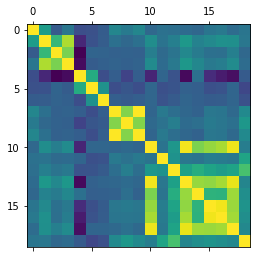

In [23]:
plt.matshow(merged.corr())

In [33]:
merged2 = merged.loc[:, ['name', 'goal', 'pledged', 'percentage_funded', 'backers_count', 'average_rating', 'users_rated', 'total_owners', 'total_wanters', 'total_comments', 'average_weight']]

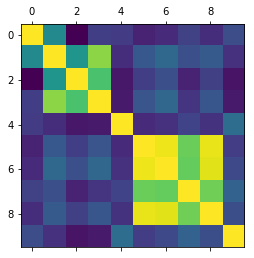

In [34]:
plt.matshow(merged2.corr())

In [35]:
len(merged2)

1249

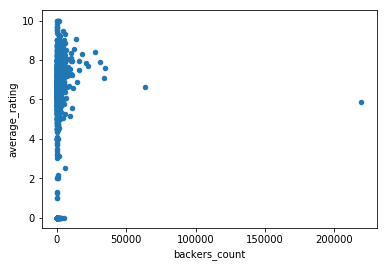

In [36]:
merged2.plot(x='backers_count', y='average_rating', kind='scatter')

In [51]:
lr = LinearRegression()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [73]:
Xt = merged2.loc[0:800, ['goal', 'pledged', 'percentage_funded', 'backers_count', 'total_owners', 'average_weight']].values
yt = merged2.loc[0:800, ['average_rating']].values.astype(int)
zt = numpy.ravel(yt)

In [91]:
lr.fit(Xt, zt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
Xs = merged2.loc[801:1606, ['goal', 'pledged', 'percentage_funded', 'backers_count', 'total_owners', 'average_weight']].values
ys = merged2.loc[801:1606, ['average_rating']].values.astype(int)
zs = numpy.ravel(ys)

In [93]:
Xp = merged2.loc[801:801, ['goal', 'pledged', 'percentage_funded', 'backers_count', 'total_owners', 'average_weight']].values

In [96]:
lr.predict(Xp)

array([4.95182854])

In [95]:
merged2.loc[801:801, ['average_rating']].values

array([[7.35533]])

In [97]:
lr.score(Xs, zs)

0.0010779215047729274